# NY Housing prices and amenities Analysis

*#
Project Title: Which housing factor is most valuable to homebuyers in New York City?

Team Members: Alana Adams, Lincoln Martin, Sharada Muthusubramanian

Project Description/Outline: 

Research Questions to Answer: 
Hypothesis: Null (H0) hypothesis - number of bedrooms increases the price of the house will not be change 
Alternative HYpothesis (H1) - as the number of bedrooms increase the price of the house will have the tendency to increase.

1. Does area of house or number of bedrooms matter more to homebuyers?
2. Is a furnished home more preferred than an unfurnished home? 
3. Does the main road status matter to homebuyers?
4. Does number of parking spaces have any correlation to housing price?
5. Do New Yorkers prefer houses with basements over guestrooms?
6. Can we predict housing price based on area of the house?
7. Do the number of bathrooms correlate with the number of bedrooms?
8. Do we see a relationship between price and number of stories in a house?
9. Does the total number of rooms (bathroom, bedroom, guestroom, basement) increase home price more than total area?



In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime
from scipy.stats import linregress
import scipy.stats as st
#%matplotlib notebook

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

# File to Load 
ny_housing = Path("Resources/Housing.csv")

# Read housing Data File and store into Pandas DataFrames
ny_housing_df = pd.read_csv(ny_housing)
ny_housing_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


## 1. Does area of house or number of bedrooms matter more to homebuyers?

In [2]:
# Establish the bins 
pr_bins = [0, 2000000, 2500000, 3000000, 3500000, 4000000, 4500000,5000000, 6000000,8000000,14000000]
price_labels = ["0 - 2M", "2M - 2.5M", "2.5M - 3M", "3M - 3.5M", "3.5M - 4M", "4M - 4.5M","4.5M - 5M","5M - 6M","6M - 8M","8M - 14M"]

In [3]:
# Establish the bins 
ar_bins = [0,3000, 5000, 7500,9000,12000,15000]
area_labels = ["0 - 3000", "3000 - 5000", "5000 - 7500", "7500 - 9000","9000 - 12000","12000 - 15000"]

In [4]:
ny_housing_copy_df = ny_housing_df.copy()
ny_housing_copy_df = ny_housing_copy_df.reset_index(drop=True)
ny_housing_copy_df


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [5]:
# Use `pd.cut` to categorize area of the house based on the bins.
ny_housing_copy_df["price_bin"] =  pd.cut( ny_housing_copy_df["price"], pr_bins,labels= price_labels, include_lowest=True, ordered=False)

ny_housing_copy_df["area_bin"] =  pd.cut( ny_housing_copy_df["area"], ar_bins,labels= area_labels, include_lowest=True, ordered=False)

ny_housing_copy_df


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price_bin,area_bin
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,8M - 14M,5000 - 7500
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,8M - 14M,7500 - 9000
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,8M - 14M,9000 - 12000
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,8M - 14M,5000 - 7500
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,8M - 14M,5000 - 7500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished,0 - 2M,0 - 3000
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished,0 - 2M,0 - 3000
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished,0 - 2M,3000 - 5000
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished,0 - 2M,0 - 3000


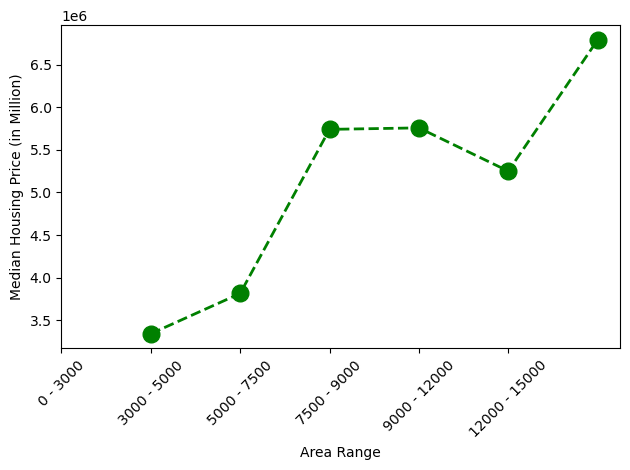

In [6]:
# Plot line graph to measure the preference of the home buyer area VS. home buyer bedrooms

line_plot_df1 = ny_housing_copy_df.groupby('area_bin').median()["price"]
line_plot_df1 = line_plot_df1.reset_index(drop=False)
line_plot_df1


#plt.line(x_axis, y_axis,  color ="green", align='center', alpha=0.75)

x_axis = line_plot_df1["area_bin"]
y_axis = line_plot_df1["price"]

plt.plot(x_axis, y_axis, color='green', marker='o', linestyle='dashed', linewidth=2, markersize=12)
y_pos = np.arange(len(line_plot_df1["area_bin"]))-1
tick_val =  line_plot_df1["area_bin"]

plt.xticks(y_pos,tick_val, rotation = 45)
plt.xlabel("Area Range")
plt.ylabel("Median Housing Price (in Million)")
plt.tight_layout()
plt.show()

# Answer 1: Area of the house matters more to NY house Market 

###Based on two data output of the two metrics, It seems Area of the house matters more than the number of bedrooms.  We can observe that the area of the house has upward trend with the increase in area of the house the price increases.  Where as, with the increase in the # of bedrooms the price drops after a certain point. Leading us believe area matters most


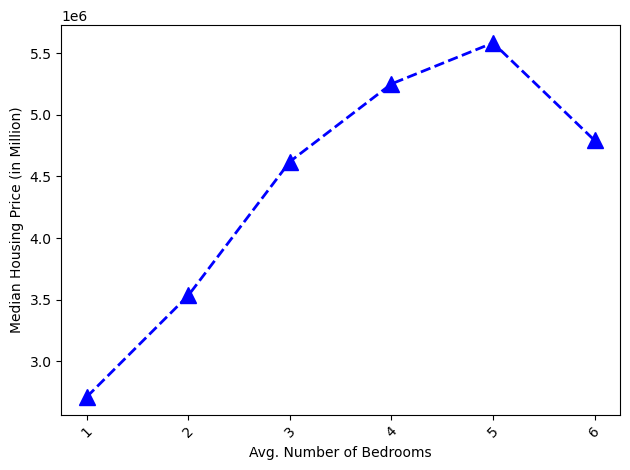

In [7]:
# /*******************************************************************************************/

line_plot_df2 = ny_housing_copy_df.groupby('bedrooms').median()["price"]
line_plot_df2 = line_plot_df2.reset_index(drop=False)
line_plot_df2

x_axis = line_plot_df2["bedrooms"]
y_axis = line_plot_df2["price"]
y_pos = np.arange(len(line_plot_df2["bedrooms"]))+1
tick_val =  line_plot_df2["bedrooms"]

plt.plot(x_axis, y_axis, color='blue', marker='^', linestyle='dashed', linewidth=2, markersize=12)
plt.xticks(y_pos, tick_val, rotation = 45)
plt.xlabel('Avg. Number of Bedrooms')
plt.ylabel("Median Housing Price (in Million)")
plt.tight_layout()

plt.show()

## 2. Is a furnished home more preferred than an unfurnished home? 

In [8]:
#Group the housing price by  furnishing status and get mean, median, mode, std deviation and variance by the furnishing status
ny_hsng_furstat_df = ny_housing_copy_df.groupby('furnishingstatus').median()["price"]
ny_hsng_furstat_df = ny_hsng_furstat_df.reset_index(drop=False)
ny_hsng_furstat_df['price'] = ny_hsng_furstat_df['price']/1000000
ny_hsng_furstat_df.describe()


,price
count,3.000000
mean,4.363333
std,0.844605
min,3.430000
25%,4.007500
50%,4.585000
75%,4.830000
max,5.075000


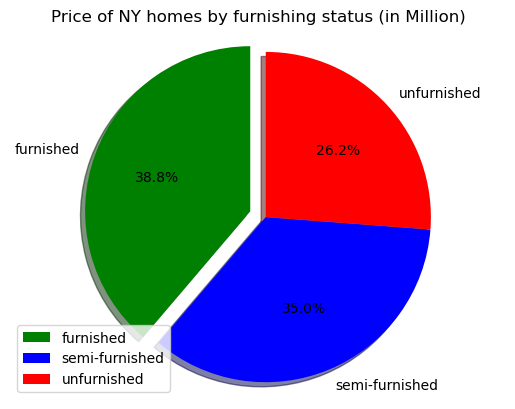

<Figure size 640x480 with 0 Axes>

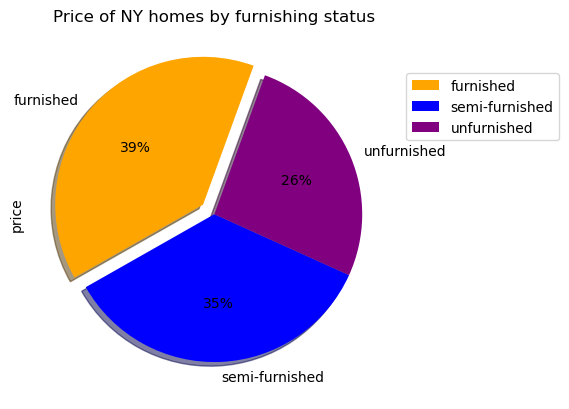

<Figure size 640x480 with 0 Axes>

In [9]:
# Generate a pie plot showing the distribution of furnishing status using pyplot
pie_plot_df = ny_hsng_furstat_df

plt.title("Price of NY homes by furnishing status (in Million)")
colors = ["green", "blue","red"]
labels = pie_plot_df["furnishingstatus"]
explode = (0.1,0,0)

plt.pie(pie_plot_df["price"], explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.legend(loc="lower left")
plt.axis("equal")
plt.show()
#save the plot as figure
plt.savefig("output_data/Fig1.png")
#*****************************************************************************************
# Generate a pie plot showing the distribution of furnishing status using Pandas

colors = ["orange", "blue", "purple"]
labels = pie_plot_df["furnishingstatus"]
explode = (0.1,0,0)

pie_plt_a = pie_plot_df.plot(kind='pie', y="price", explode = explode, colors = colors, labels = labels,legend=True, title='Price of NY homes by furnishing status', autopct='%1.0f%%', startangle = 70, shadow = True)
pie_plt_a.legend(bbox_to_anchor=(1, .9), loc='upper left')
plt.show()
#save the plot as figure
plt.savefig("output_data/Fig2.png")

## Answer 2. Furnished homes are preferred over semi or unfurnished home. 
As we can see from the price relationship between Furnished vs. Unfurnished Furnished homes have 37.8% higher price than unfurnished.  So we can conclude that furnished homes are more preferred as the home owners are willing pay higer price for furnished homes.

## 3. Does the main road status matter to homebuyers?

In [10]:
#Group the housing price by Mainroad and get mean
main_road_prices_df = ny_housing_df.groupby("mainroad").mean()["price"]
main_road_prices_df

mainroad
no     3.398905e+06
yes    4.991777e+06
Name: price, dtype: float64

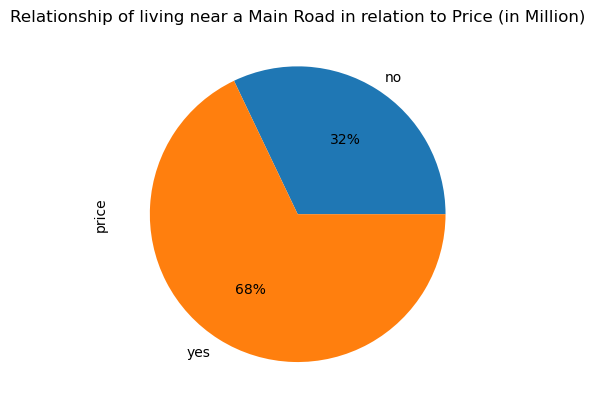

In [11]:
# plot a pie chrt to show the preferance
main_road_pie = ny_housing_df.groupby("mainroad").std()["price"]
main_road_pie.plot.pie(autopct= "%1.0f%%")
plt.title("Relationship of living near a Main Road in relation to Price (in Million)")
plt.savefig("output_data/Fig3.png")
plt.show()

**Question 3 Answer**

* Based on the data gathered, home prices are less similar when close to a main road, as opposed to not being near a main road.
* This can be determined when observing the standard deviation of home prices that are located near a main road or not. The standard deviation of prices for homes near a main road is higher than homes not near a main road.

##  4. Does number of parking spaces have any correlation to housing price?

In [12]:
#calculate the correlation coefficent parking spaces in realtion to housing price
correlation = st.pearsonr(ny_housing_df["parking"],ny_housing_df["price"])
# Print statement
print(f"The correlation between parking spaces and the housing price is {round(correlation[0],2)}")

# calculate slope, intercepts, pvalue, rvalue 
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(ny_housing_df["parking"], ny_housing_df["price"])
reg_values = ny_housing_df["parking"] * slope + intercept
line_eq = f"y = {round(slope, 2)} x + {round(intercept, 2)}"

The correlation between parking spaces and the housing price is 0.38


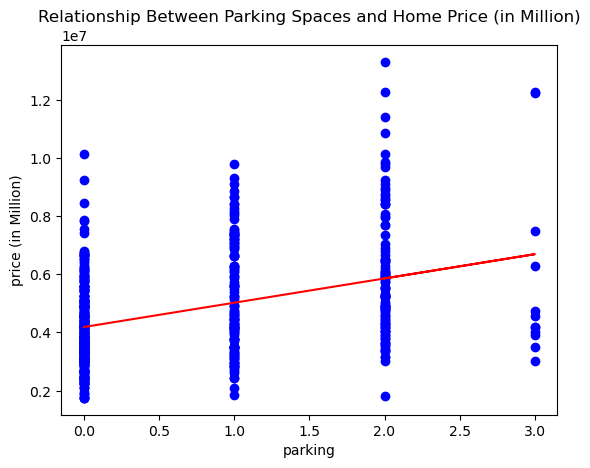

In [13]:
# Plot scatter plot and draw the linear regression
#index = numpy.seachsorted("price", "parking")
plt.scatter(ny_housing_df["parking"], ny_housing_df["price"], color="blue")
plt.plot(ny_housing_df["parking"], reg_values, color="red")
plt.title("Relationship Between Parking Spaces and Home Price (in Million)")
y_axis_val = ny_housing_df["price"]
x_axis_val = ny_housing_df["parking"]
#ticks = range(len("price"))
#plt.xticks(ticks, labels="price")
plt.xlabel("parking")
plt.ylabel("price (in Million)")
plt.savefig("output_data/Fig4.png")
plt.show()

**Question 4 Answer**

* Generally, the number of parking spaces of a home produces a more saturated cluster of consolidated data.
* When observing the data, as parking spaces for homes increase, the price of homes increases.

## 5. Do New Yorkers pay more value with houses with basements over guestrooms?

                        price
guestroom_and_basement       
basement                  120
both                       71
guestroom                  26
neither                   328
                           price
guestroom_and_basement          
basement                4.959908
both                    5.720430
guestroom               5.990788
neither                 4.392584


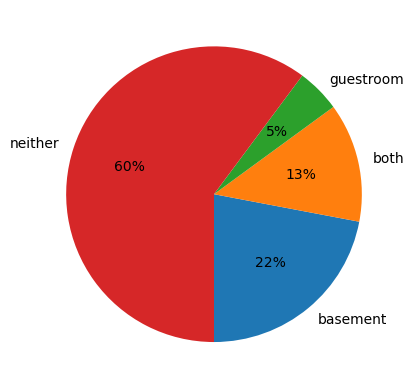

In [14]:
#copy ny_housing_df
basements_vs_guestrooms_df = ny_housing_df.copy(deep=True)

#drop unnecessary columns
basements_vs_guestrooms_df = basements_vs_guestrooms_df.drop(["area", "bedrooms", "bathrooms", "stories", "mainroad", "hotwaterheating", "airconditioning", "parking", "prefarea", "furnishingstatus"], axis=1)

#add comparison column
basements_vs_guestrooms_df["guestroom_and_basement"] = basements_vs_guestrooms_df["guestroom"].astype(str) +"_and_" + basements_vs_guestrooms_df["basement"]

#replace no_and_no with neither, replace no_and_yes with basement, replace yes_and_yes with both, and replace yes_and_no with guestroom
basements_vs_guestrooms_df.loc[basements_vs_guestrooms_df["guestroom_and_basement"] == "no_and_no", "guestroom_and_basement"] = "neither"
basements_vs_guestrooms_df.loc[basements_vs_guestrooms_df["guestroom_and_basement"] == "no_and_yes", "guestroom_and_basement"] = "basement"
basements_vs_guestrooms_df.loc[basements_vs_guestrooms_df["guestroom_and_basement"] == "yes_and_no", "guestroom_and_basement"] = "guestroom"
basements_vs_guestrooms_df.loc[basements_vs_guestrooms_df["guestroom_and_basement"] == "yes_and_yes", "guestroom_and_basement"] = "both"
basements_vs_guestrooms_df.head()

#Calculate the number of houses with basement and with guestrooms and with both basement & guestrooms
bsmt_gstrm_count = basements_vs_guestrooms_df.groupby(["guestroom_and_basement"]).count()["price"]
bsmt_gstrm_count_df = pd.DataFrame(bsmt_gstrm_count)
print(bsmt_gstrm_count_df)

#Calculate the average housing price with basement and with guestrooms and with both basement & guestrooms in the millions
bsmt_gstrm_average = basements_vs_guestrooms_df.groupby(["guestroom_and_basement"]).mean()["price"]/1000000
bsmt_gstrm_average_df = pd.DataFrame(bsmt_gstrm_average)
print(bsmt_gstrm_average_df)

#create pie chart for homebuyer preferences
bsmt_gstrm_count.plot(kind='pie', y='price', autopct='%1.0f%%', startangle=270, ylabel='')
plt.savefig("output_data/Fig5a.png")
plt.show()

F_onewayResult(statistic=15.868354541445633, pvalue=6.673363122676321e-10)

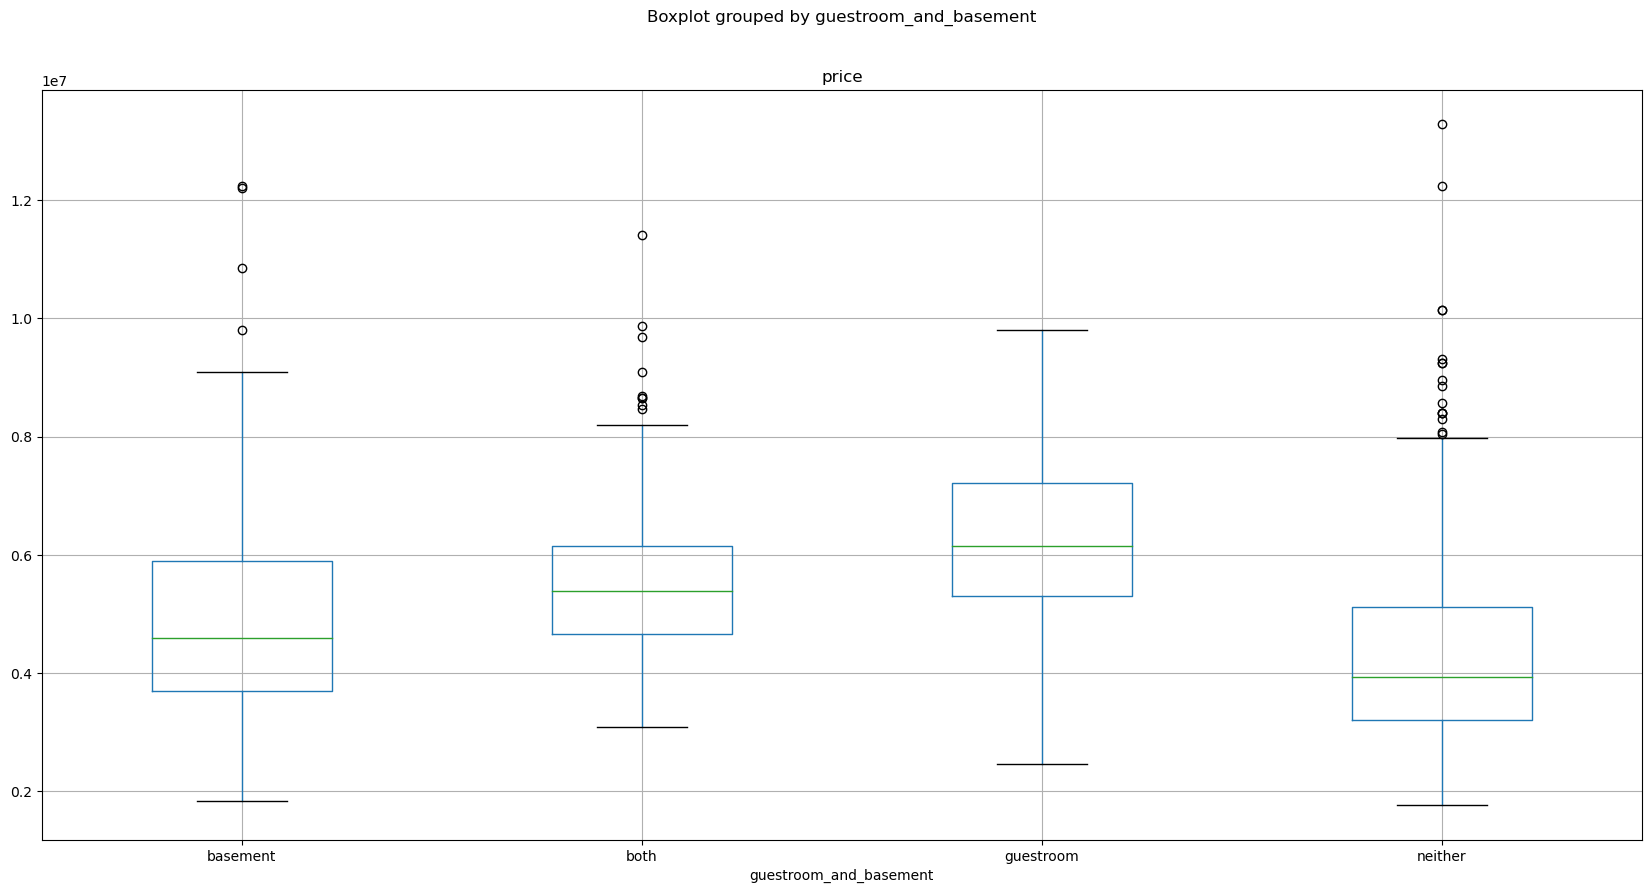

In [15]:
# Create a boxplot to compare means
basements_vs_guestrooms_df.boxplot("price", by="guestroom_and_basement", figsize=(20, 10))
plt.savefig("output_data/Fig5b.png")

# Extract individual groups
basement = basements_vs_guestrooms_df[basements_vs_guestrooms_df["guestroom_and_basement"] == "basement"]["price"]
both = basements_vs_guestrooms_df[basements_vs_guestrooms_df["guestroom_and_basement"] == "both"]["price"]
guestroom = basements_vs_guestrooms_df[basements_vs_guestrooms_df["guestroom_and_basement"] == "guestroom"]["price"]
neither = basements_vs_guestrooms_df[basements_vs_guestrooms_df["guestroom_and_basement"] == "neither"]["price"]

# Perform the ANOVA
st.f_oneway(basement, both, guestroom, neither)

## 6. Can we predict housing price based on area of the house?

                    price      area  price(millions)
price            1.000000  0.535997         1.000000
area             0.535997  1.000000         0.535997
price(millions)  1.000000  0.535997         1.000000

*******************
The r-value is: 0.2872931546811469
*******************
Given the house price of $5.005 million, the estimated area of the house would be 5666.0.  The actual area of this house with price $5.005 million is 8150 meters squared.  This is a difference of -30.0%.
*******************
Given the house area of 7410, the estimated price of the house would be 5.810542 million dollars.  The actual price of this house with area 7410 is 6.475 million dollars.  This is a difference of -10.0%.


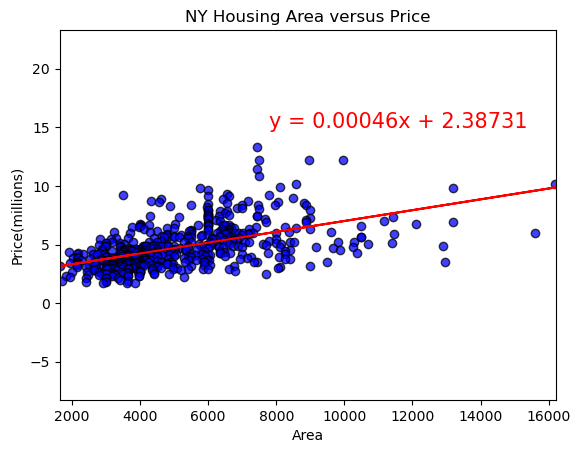

In [16]:
#copy ny_housing_df
area_vs_price_df = ny_housing_df.copy(deep=True)

#drop unnecessary columns
area_vs_price_df = area_vs_price_df.drop(["basement", "guestroom", "bedrooms", "bathrooms", "stories", "mainroad", "hotwaterheating", "airconditioning", "parking", "prefarea", "furnishingstatus"], axis=1)
area_vs_price_df["price(millions)"]=area_vs_price_df["price"]/1000000

#calculate the correlation coefficient area in realtion to housing price in millions
area_corr_coeff = area_vs_price_df.corr(method='pearson',min_periods=1)
print(area_corr_coeff)

#Scatter Plot
plt.scatter(area_vs_price_df["area"], area_vs_price_df["price(millions)"], marker="o", facecolors="b", edgecolors="black", alpha=0.75)
plt.ylim(area_vs_price_df["price(millions)"].min()-10,area_vs_price_df["price(millions)"].max()+10)
plt.xlim(area_vs_price_df["area"].min()-10,area_vs_price_df["area"].max()+10)
plt.title("NY Housing Area versus Price")
plt.xlabel("Area")
plt.ylabel("Price(millions)")

#calculate slope, intercepts, pvalue, rvalue the best fit line to calculate the housing price
df_slope, df_int, df_r, df_p, df_std_err = linregress(area_vs_price_df["area"], area_vs_price_df["price(millions)"])
df_fit = df_slope * area_vs_price_df["area"] + df_int
plt.plot(area_vs_price_df["area"],df_fit,"r-")
line_eq = "y = " + str(round(df_slope,5)) + "x + " + str(round(df_int,5))
plt.annotate(line_eq,(7800,15),fontsize=15,color="red")

area_estimate = round((5.00500-df_int)/df_slope,0)
area_actual = 8150
diff_in_area = round((area_estimate-area_actual)/area_actual,2)*100
price_estimate = round((df_slope*7410) + df_int,6)
price_actual = 6.475000
diff_in_price = round((price_estimate-price_actual)/price_actual,2)*100

print()
print("*******************")
print(f"The r-value is: {df_r**2}")
print("*******************")
print(f"Given the house price of $5.005 million, the estimated area of the house would be {area_estimate}.  The actual area of this house with price $5.005 million is {area_actual} meters squared.  This is a difference of {diff_in_area}%.")
print("*******************")
print(f"Given the house area of 7410, the estimated price of the house would be {price_estimate} million dollars.  The actual price of this house with area 7410 is {price_actual} million dollars.  This is a difference of {diff_in_price}%.")

# Save the figure
plt.savefig("output_data/Fig6.png")

# Show plot
plt.show()

**Question 6 Interpretation

* The correlation coefficient between Area and Price is 0.54. This shows a moderate positive correlation, such that as Area increases, price also increased. However, the r-value of 0.29 indicates that area and price have a low correlation. This was also indicated by our sample tests.

* In the first test, there was a 30% difference between the predicted area (5666) and actual area (8150) when given the house price (5.005 million dollars).

* In the second test, there was a 10% difference between the predicted price (5.810542 million dollars) and actual price (6.475 million dollars ) when given the house area (7410).

* There insufficient correlation between Area and Price to determine with confidence the affect Area has on NY Housing Prices.

##  7. Do the number of bathrooms correlate with the number of bedrooms?

              price  bedrooms  bathrooms
price      1.000000  0.366494   0.517545
bedrooms   0.366494  1.000000   0.373930
bathrooms  0.517545  0.373930   1.000000


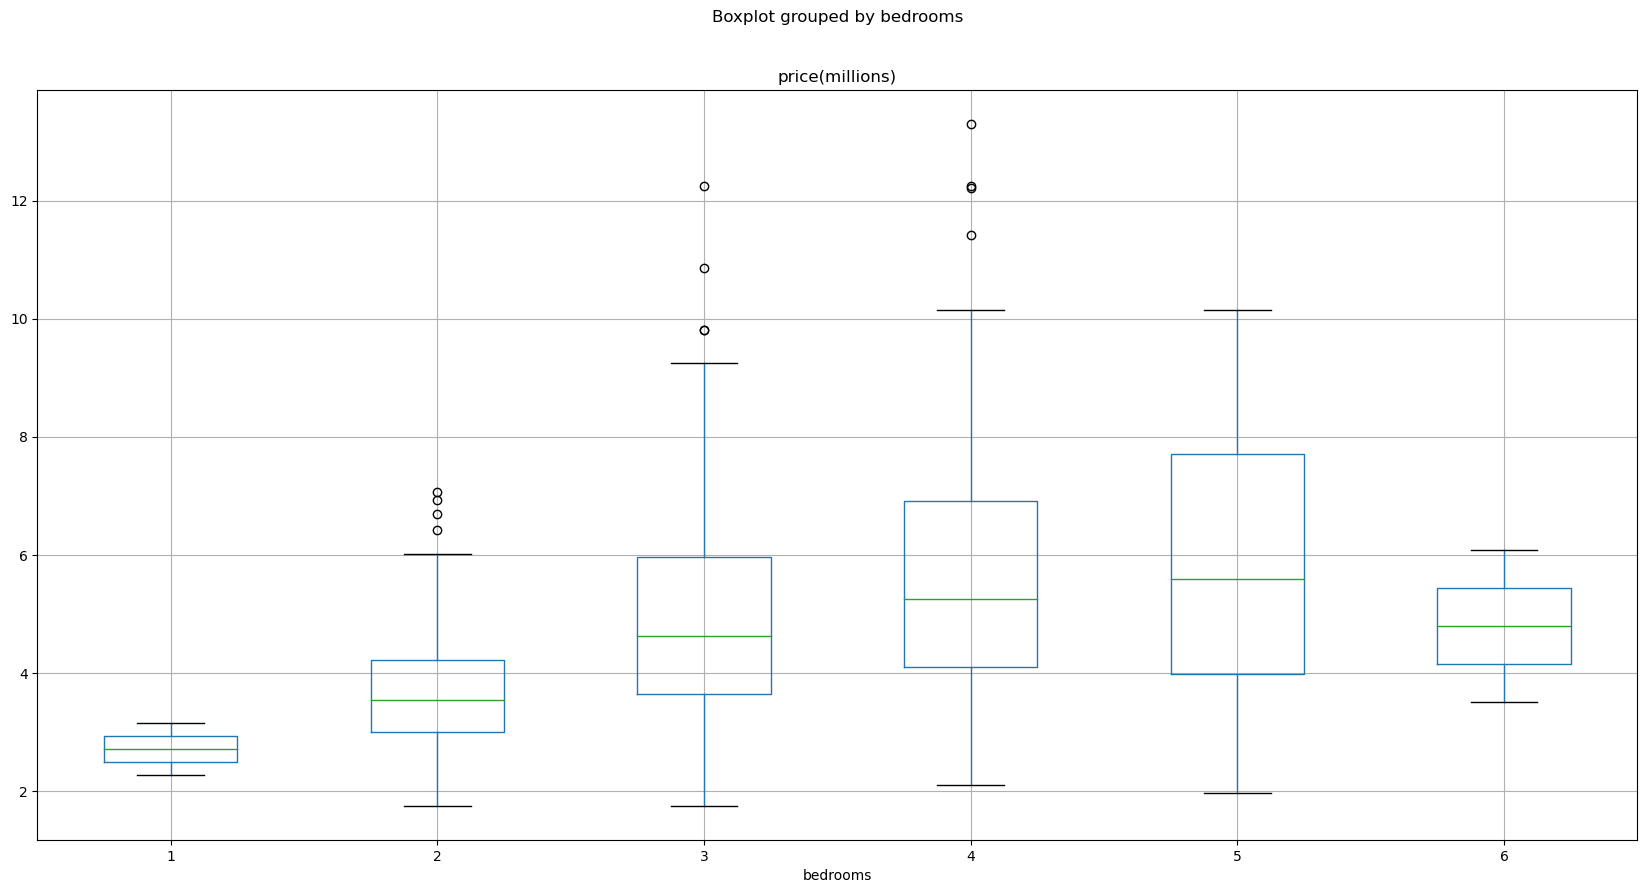

In [17]:
#copy ny_housing_df
bathrooms_vs_bedrooms_vs_price_df = ny_housing_df.copy(deep=True)

#drop unnecessary columns
bathrooms_vs_bedrooms_vs_price_df = bathrooms_vs_bedrooms_vs_price_df.drop(["basement", "guestroom", "area", "stories", "mainroad", "hotwaterheating", "airconditioning", "parking", "prefarea", "furnishingstatus"], axis=1)

#calculate the correlation coefficent between bathrooms and number of bedrooms inrelation to pricing
bathroom_price_corr_coeff = bathrooms_vs_bedrooms_vs_price_df.corr(method='pearson',min_periods=1)
print(bathroom_price_corr_coeff)

bathrooms_vs_bedrooms_vs_price_df["price(millions)"]=bathrooms_vs_bedrooms_vs_price_df["price"]/1000000

#create box plot of number of bedrooms vs total price in millions
bathrooms_vs_bedrooms_vs_price_df.boxplot("price(millions)", by="bedrooms", figsize=(20, 10))
plt.savefig("output_data/Fig7a.png")



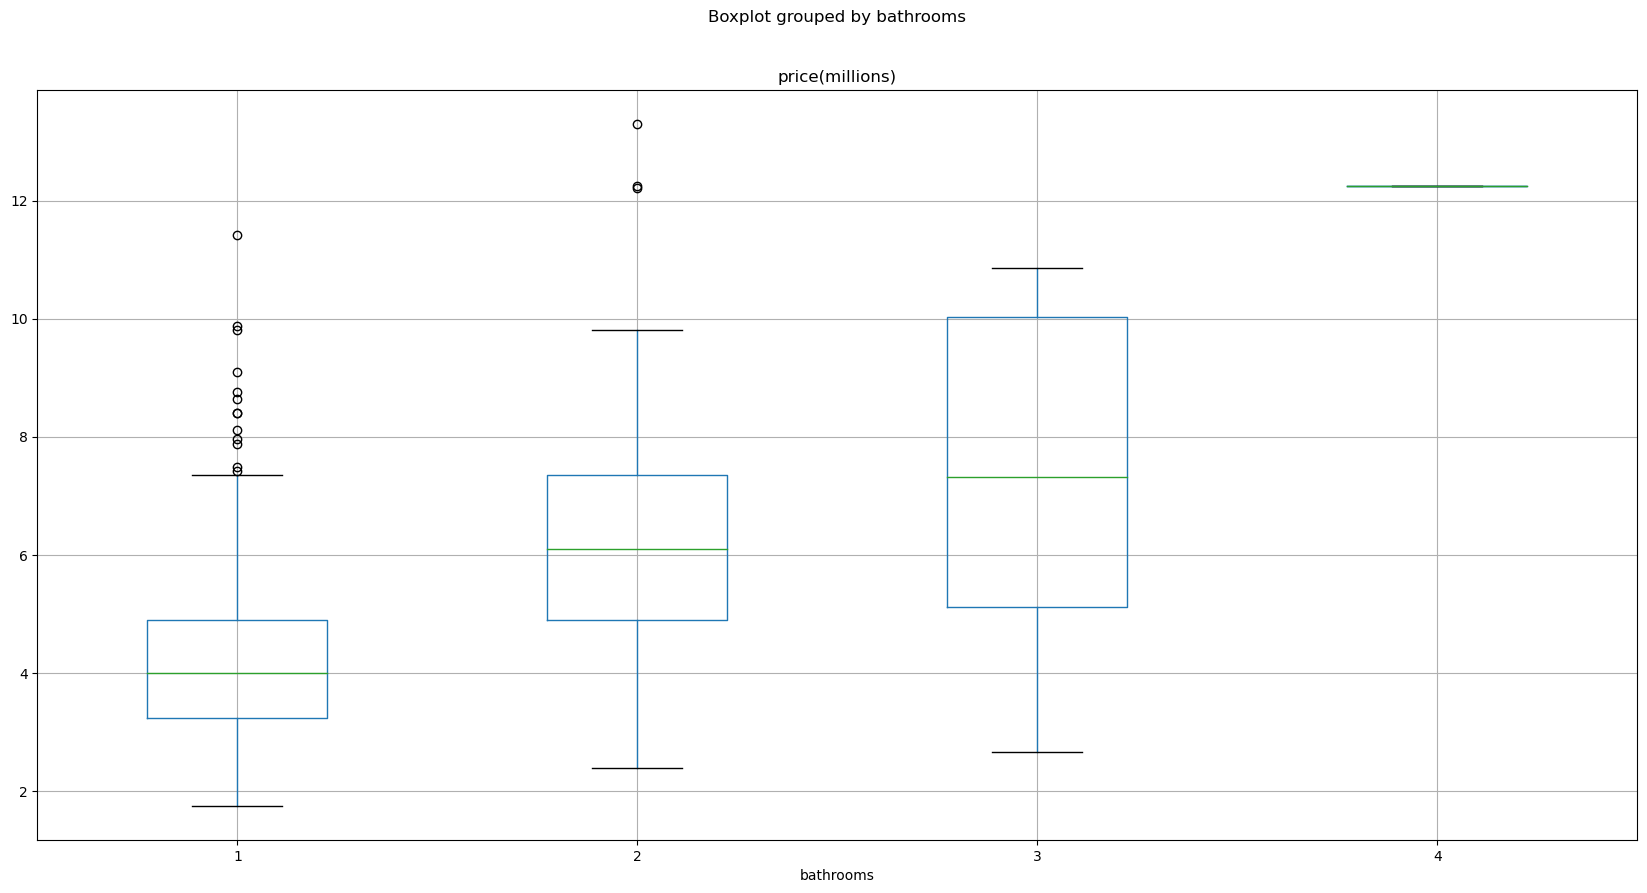

In [18]:
#create box plot of number of bathrooms vs total price in millions
bathrooms_vs_bedrooms_vs_price_df.boxplot("price(millions)", by="bathrooms", figsize=(20, 10))
plt.savefig("output_data/Fig7b.png")

**Question 7 Interpretation

* The correlation coefficient between Bedrooms and Price is 0.37. This indicates a very weak correlation between Bedrooms and Price such that as the number of bedrooms in a house increases, the price is likely to increase.

* The correlation coefficient between Bathrooms and Price is 0.52. This indicates a moderate correlation between Bedrooms and Price such that as the number of bathrooms in a house increases, the price is likely to increase.

* The correlation coefficient between Bedrooms and Bathrooms is 0.37. This indicates a very weak correlation between Bedrooms and Price such that as the number of bedrooms in a house increases, the number of bathrooms. is likely to increase.

* This data indicates that the number of bathrooms in a house is more favorable to homebuyers than the number of bedrooms, because the correlation coefficients indicate a stronger positive relationship between number of bathrooms and price than number of bedrooms and price. This refutes the claim that bedrooms are the most important feature to homebuyers.

##  8. Do we see a relationship between price and number of stories in a house?

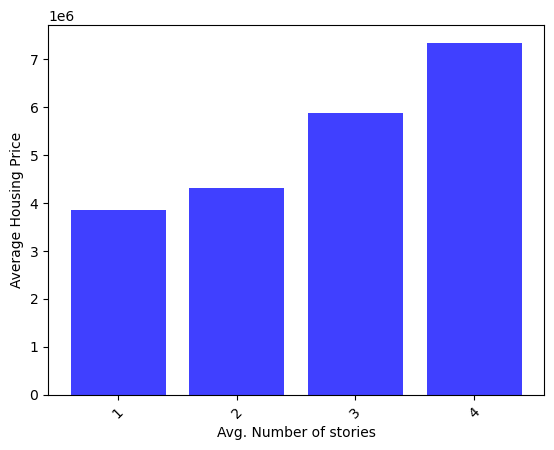

In [19]:
#bar plot number of stories to price
bar_plot_df3 = ny_housing_copy_df.groupby('stories').median()["price"]
bar_plot_df3 = bar_plot_df3.reset_index(drop=False)
bar_plot_df3

x_axis = bar_plot_df3["stories"]
y_axis = bar_plot_df3["price"]
y_pos = np.arange(len(bar_plot_df3["stories"]))+1
tick_val =  bar_plot_df3["stories"]

plt.bar(x_axis, y_axis,  color ="blue", align='center', alpha=0.75)
plt.xticks(y_pos, tick_val, rotation = 45)
plt.xlabel('Avg. Number of stories')
plt.ylabel("Average Housing Price")

plt.savefig("output_data/Fig8a.png")
plt.show()

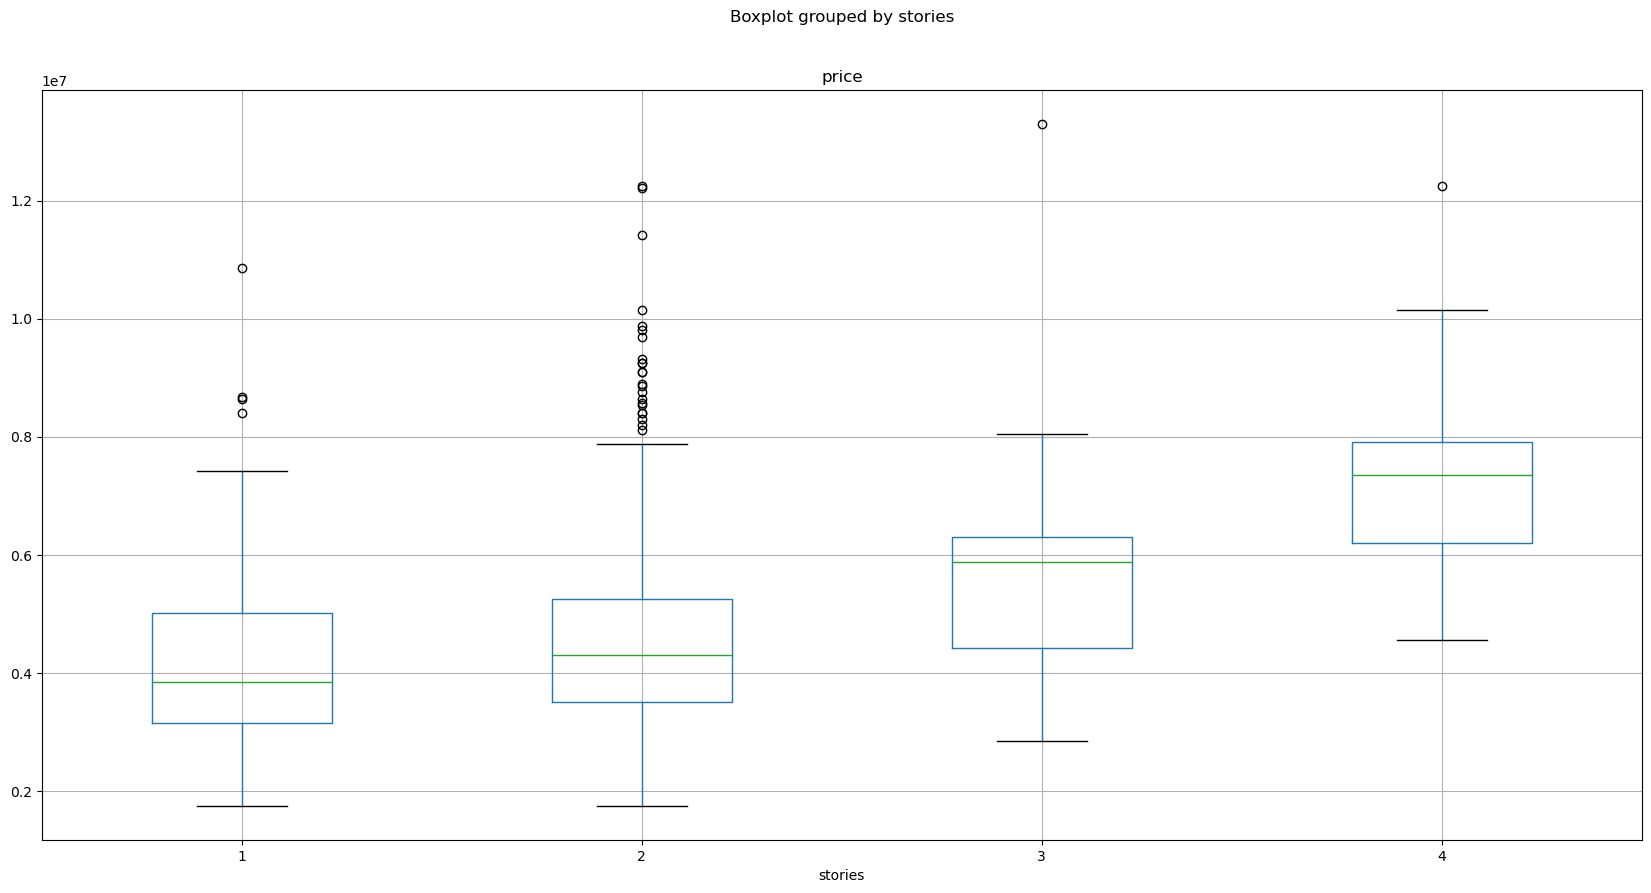

In [20]:
ny_housing_copy_df.boxplot("price", by="stories", figsize=(20, 10))
plt.savefig("output_data/Fig8b.png")

In [21]:
# Extract individual groups
group0 = ny_housing_copy_df[ny_housing_copy_df["stories"] == 1]["price"]
group1 = ny_housing_copy_df[ny_housing_copy_df["stories"] == 2]["price"]
group2 = ny_housing_copy_df[ny_housing_copy_df["stories"] == 3]["price"]
group3 = ny_housing_copy_df[ny_housing_copy_df["stories"] == 4]["price"]

st.f_oneway(group0, group1, group2, group3)

F_onewayResult(statistic=41.78230944700161, pvalue=2.6832459713031025e-24)

In [22]:
st.f_oneway(group0, group1)

F_onewayResult(statistic=14.161926742395657, pvalue=0.00018927810499715325)

In [23]:
st.f_oneway(group2, group3)

F_onewayResult(statistic=17.41966596219819, pvalue=7.726162647959343e-05)

##  Answer for 8: 
The bar chart shows that, with the increase in number of stories have higher house price. However, ANOVA p_value of 2.6832459713031025 × 10-24 shows that relationship between price and stories is not statistically significant. Even when checked for two groups results are pretty similar.


##  9. Does the total number of rooms (bathroom, bedroom, guestroom, basement) increase home price more than total area?

In [24]:
# summerize the number of rooms and store it in a new column
ny_rooms_copy_df = ny_housing_df.copy()
ny_rooms_copy_df = ny_rooms_copy_df.reset_index(drop=True)
#Converting boolean to number
ny_rooms_copy_df["guest_rm"] = ny_rooms_copy_df["guestroom"].apply(lambda x: 1 if x == 'yes' else 0)
ny_rooms_copy_df["basemnt_cnt"] = ny_rooms_copy_df["basement"].apply(lambda y: 1 if y == 'yes' else 0)

ny_rooms_copy_df["Total_number_of_rms"] = ny_rooms_copy_df["basemnt_cnt"]+ny_rooms_copy_df["guest_rm"]+ny_rooms_copy_df["bedrooms"]+ny_rooms_copy_df["bathrooms"]
ny_rooms_copy_df


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,guest_rm,basemnt_cnt,Total_number_of_rms
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,0,0,6
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,0,0,8
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,0,1,6
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,0,1,7
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,1,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished,0,1,4
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished,0,0,4
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished,0,0,3
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished,0,0,4


In [25]:
#calculate average price per room and average price per sqrft
average_price_per_room = ny_rooms_copy_df["price"].sum()/ny_rooms_copy_df["Total_number_of_rms"].sum()
average_price_per_sqrt = ny_rooms_copy_df["price"].sum()/ny_rooms_copy_df["area"].sum()
print(average_price_per_room)
print(average_price_per_sqrt)

997261.9731285989
925.4812231367862


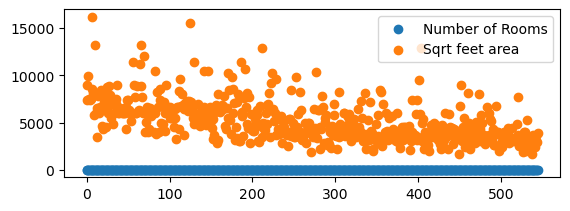

In [26]:
# Scatter Plot of Data
plt.subplot(2, 1, 1)
plt.scatter(range(len(ny_rooms_copy_df["Total_number_of_rms"])), ny_rooms_copy_df["Total_number_of_rms"], label="Number of Rooms")
plt.scatter(range(len(ny_rooms_copy_df["area"])), ny_rooms_copy_df["area"], label="Sqrt feet area")
plt.legend()

# Note: Setting equal_var=False performs Welch's t-test which does 
# not assume equal population variance
st.ttest_ind(ny_rooms_copy_df["Total_number_of_rms"], ny_rooms_copy_df["area"], equal_var=False)
plt.savefig("output_data/Fig9.png")

##  10. General Data Analysis of NY housing market

In [27]:
# create a dataframe of homes that are prices above 5 million dollar  
exp_ny_housing_df = ny_housing_copy_df[ny_housing_copy_df["price"] >= 5000000 ]
exp_ny_housing_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price_bin,area_bin
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,8M - 14M,5000 - 7500
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,8M - 14M,7500 - 9000
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,8M - 14M,9000 - 12000
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,8M - 14M,5000 - 7500
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,8M - 14M,5000 - 7500


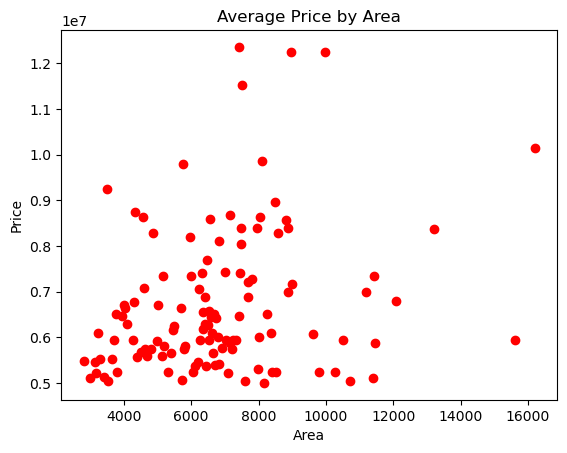

<Figure size 640x480 with 0 Axes>

In [28]:
#Generate scatter plot between price and area of the greater than 5 million+ dollar homes
scatt_plot_exp_hsng = exp_ny_housing_df.groupby(["area"]).mean()["price"]
scatt_plot_exp_hsng = scatt_plot_exp_hsng.reset_index()
scatt_plot_exp_hsng

y_axis_val = scatt_plot_exp_hsng["price"]
x_axis_val = scatt_plot_exp_hsng["area"]

plt.scatter(x_axis_val,y_axis_val, color="red")
plt.title('Average Price by Area')
plt.ylabel('Price')
plt.xlabel('Area')

plt.show()
plt.savefig("output_data/Fig10.png")

##  10. The area and price of NY homes have a positive correlation